Dane wczytane pomyślnie.

Szereg czasowy z indeksem daty:


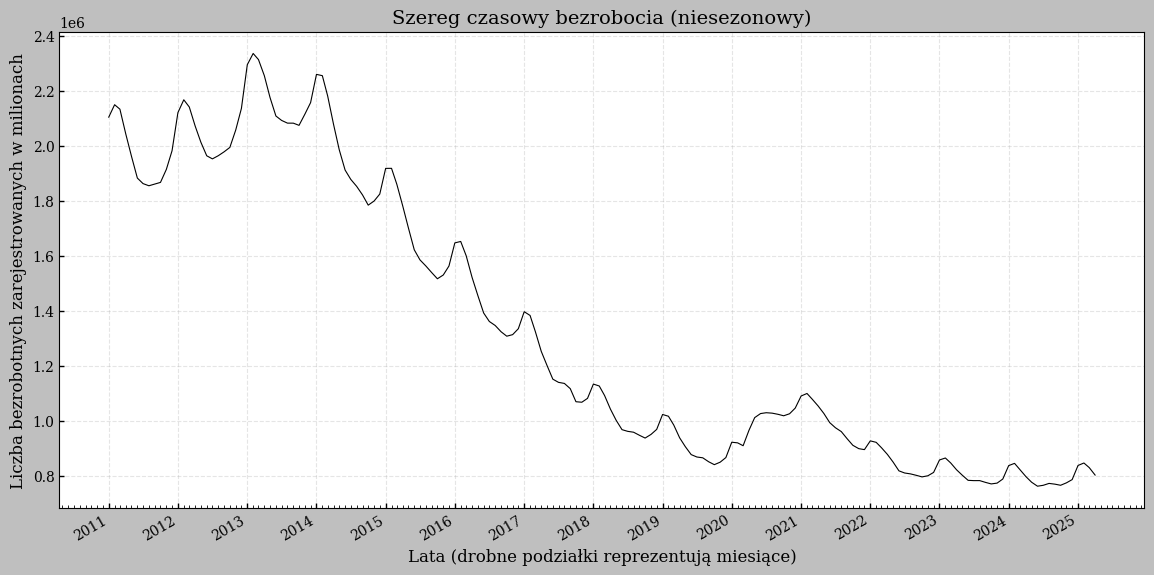


Interpretacja wstępnego wykresu: Szereg czasowy powinien zostać wizualnie oceniony pod kątem trendu, wariancji i wszelkich oczywistych oznak niestacjonarności.
Brak widocznej sezonowości jest oczekiwany dla szeregu niesezonowego.


In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates # Do formatowania dat na osi X

# --- Styl wykresów ---
plt.style.use('grayscale')
plt.rcParams.update({
    'text.usetex': False,
    'font.family': 'serif',
    'font.serif': ['Computer Modern Roman', 'DejaVu Serif', 'Arial'],
    'axes.titlesize': 14,
    'axes.labelsize': 12,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'lines.linewidth': 0.8, # Zmniejszona grubość linii
    'lines.markersize': 6,
    'scatter.edgecolors': 'black',
    'xtick.direction': 'in',
    'ytick.direction': 'in',
    'xtick.major.width': 1.0,
    'ytick.major.width': 1.0,
    'grid.linestyle': '--',
    'grid.color': '#aaaaaa',
    'grid.alpha': 0.3,
    'figure.figsize': (14, 7)
})

# Ustawienie ścieżki do pliku
file_path = "bezrobocie_czasowe.xlsx"

# 1. Wczytywanie danych
try:
    df = pd.read_excel(file_path)
    print("Dane wczytane pomyślnie.")
except FileNotFoundError:
    print(f"Błąd: Plik '{file_path}' nie został znaleziony. Upewnij się, że plik jest w tym samym katalogu co notebook, lub podaj pełną ścieżkę.")
    exit()

# Zdefiniowanie szeregu czasowego
# PRZYKŁAD: Załóżmy, że kolumna z datami nazywa się 'Data'
# Jeśli Twoja kolumna z datami ma inną nazwę, zmień 'Data' na właściwą nazwę.
if 'Data' in df.columns:
    df['Data'] = pd.to_datetime(df['Data'])
    y = df.set_index('Data')["Wartosc"].dropna()
    print("\nSzereg czasowy z indeksem daty:")
else:
    y = df["Wartosc"].dropna().reset_index(drop=True)
    print("\nBrak kolumny 'Data'. Wykres będzie miał indeks numeryczny, nie lata.")
    print("Aby wyświetlić daty, upewnij się, że plik Excel zawiera kolumnę z datami, np. 'Data', i wskaż ją w kodzie.")



# 2. Wizualizacja szeregu niesezonowego
plt.plot(y)
plt.title('Szereg czasowy bezrobocia (niesezonowy)')
plt.xlabel('Lata (drobne podziałki reprezentują miesiące)')
plt.ylabel('Liczba bezrobotnych zarejestrowanych w milionach')
plt.grid(True)

# Formatowanie osi X, aby wyświetlać lata i miesiące (jeśli indeks jest datą)
if isinstance(y.index, pd.DatetimeIndex):
    # Ustawianie głównych znaczników co rok
    plt.gca().xaxis.set_major_locator(mdates.YearLocator())
    # Formatowanie głównych znaczników, aby wyświetlały tylko rok
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

    # Dodawanie mniejszych podziałek co miesiąc
    plt.gca().xaxis.set_minor_locator(mdates.MonthLocator())
    # Możesz opcjonalnie dodać formatowanie dla mniejszych znaczników, ale to może zagęścić wykres
    # plt.gca().xaxis.set_minor_formatter(mdates.DateFormatter('%m')) # Wyświetla numer miesiąca

    # Obracanie etykiet dla lepszej czytelności
    plt.gcf().autofmt_xdate()

plt.show()

print("\nInterpretacja wstępnego wykresu: Szereg czasowy powinien zostać wizualnie oceniony pod kątem trendu, wariancji i wszelkich oczywistych oznak niestacjonarności.")
print("Brak widocznej sezonowości jest oczekiwany dla szeregu niesezonowego.")

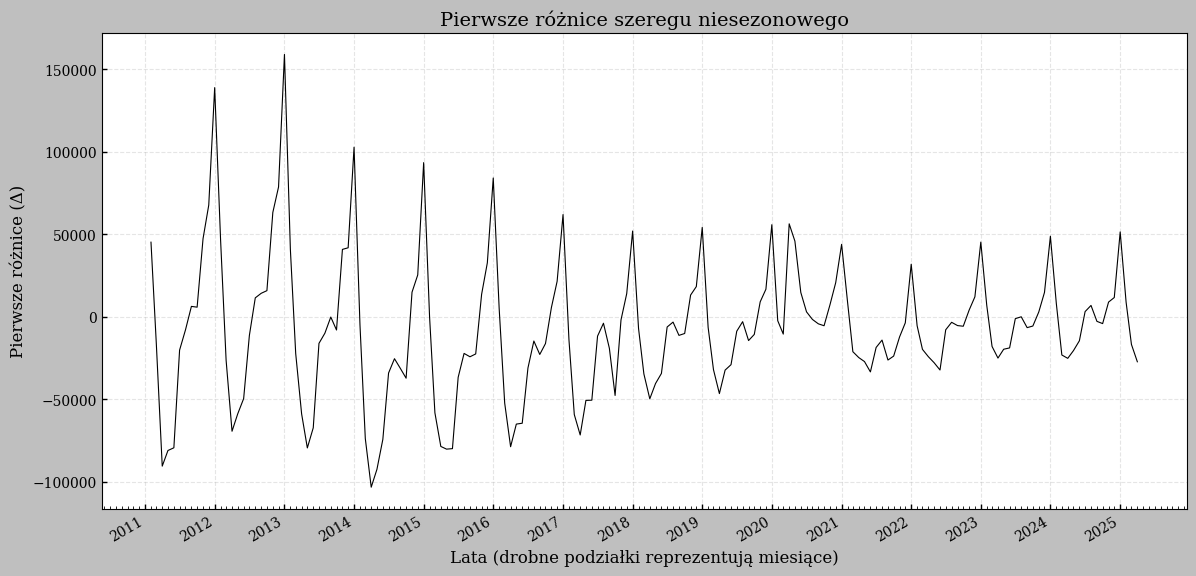


Pierwsze różnice zostały obliczone i przedstawione na wykresie.


In [21]:
# --- Obliczanie pierwszych różnic ---
y_diff = y.diff().dropna()

# --- Wykres pierwszych różnic ---
plt.figure(figsize=(14, 7))
plt.plot(y_diff, color='black')  # linia w skali szarości
plt.title('Pierwsze różnice szeregu niesezonowego')
plt.xlabel('Lata (drobne podziałki reprezentują miesiące)')
plt.ylabel('Pierwsze różnice (Δ)')
plt.grid(True)

# Formatowanie osi X (jeśli indeks to daty)
if isinstance(y_diff.index, pd.DatetimeIndex):
    plt.gca().xaxis.set_major_locator(mdates.YearLocator())
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    plt.gca().xaxis.set_minor_locator(mdates.MonthLocator())
    plt.gcf().autofmt_xdate()

plt.show()

print("\nPierwsze różnice zostały obliczone i przedstawione na wykresie.")


Dane wczytane pomyślnie.

--- Rozpoczęcie testu Boxa-Coxa ---
Optymalna wartość lambda (Boxa-Coxa): -0.6667
Transformacja potęgowa z wykładnikiem -0.6667 może poprawić własności szeregu.


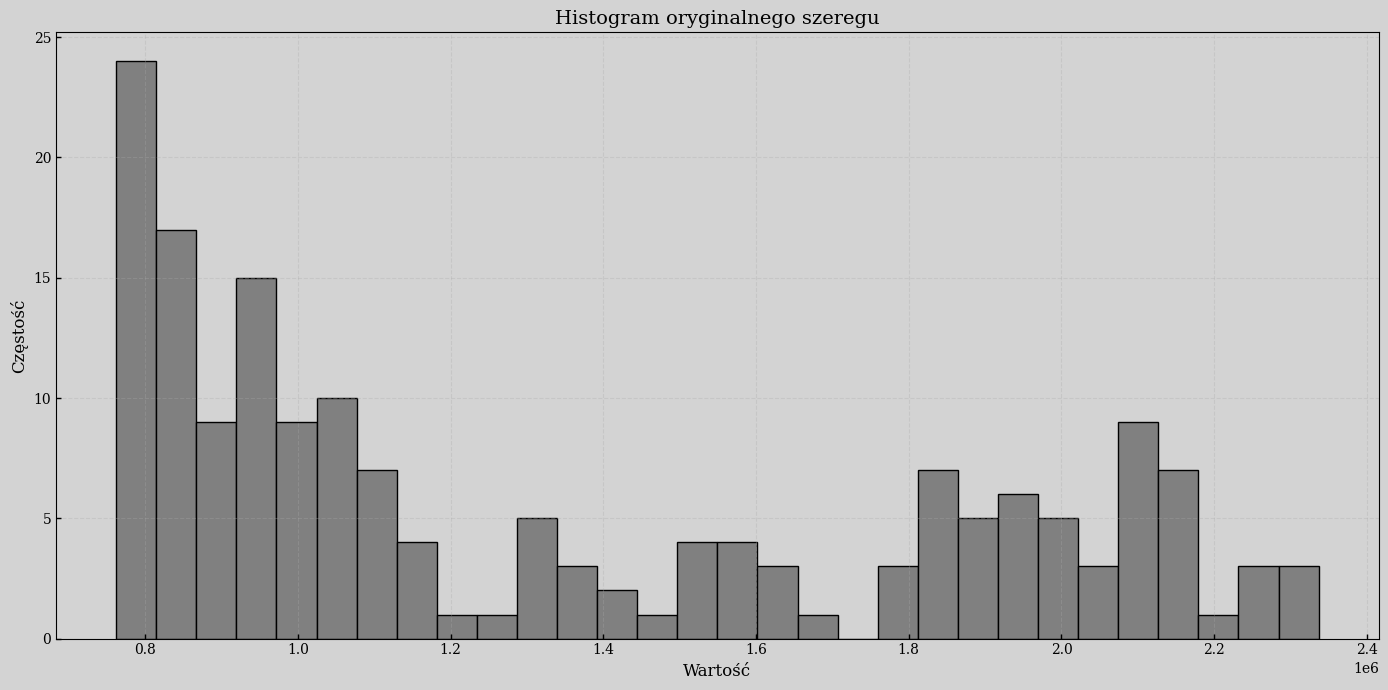

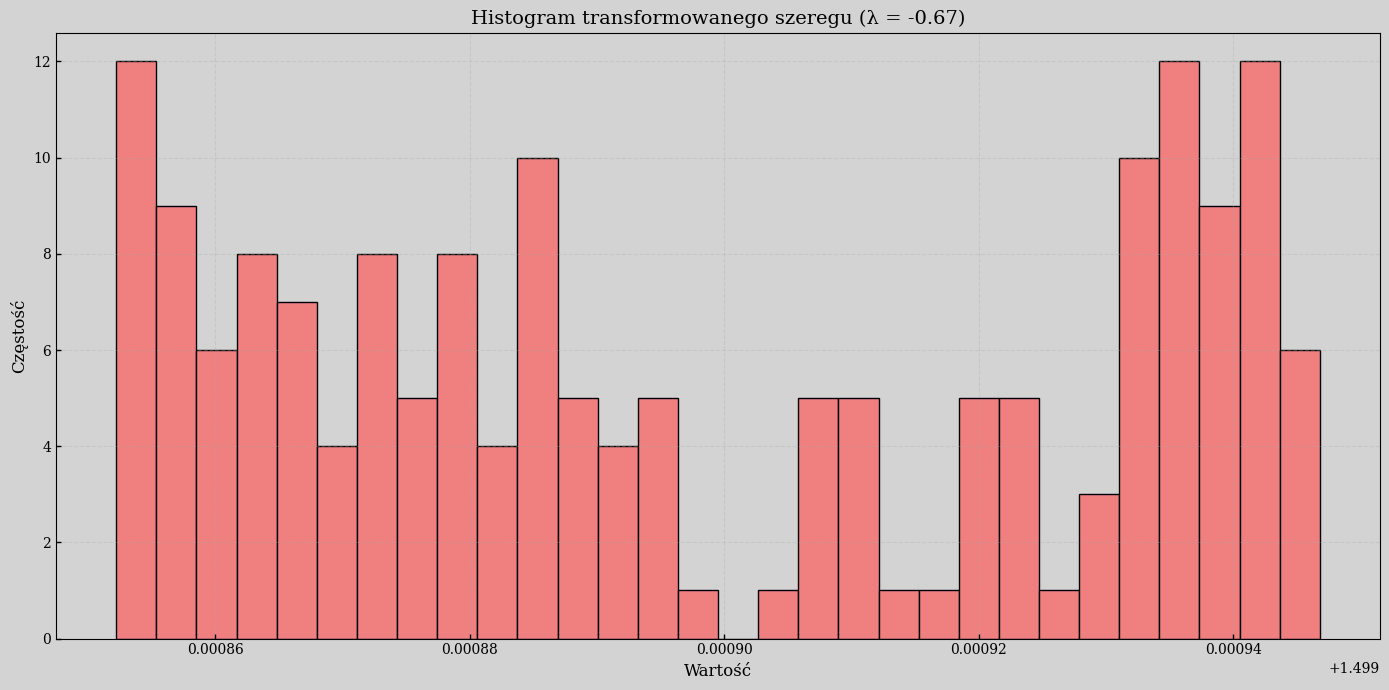


Interpretacja testu Boxa-Coxa:
- Otrzymana wartość lambda pozwala ocenić, czy przekształcenie jest konieczne.
- Histogramy ułatwiają ocenę symetrii i rozkładu.
- W przypadku niestacjonarności strukturalnej (np. trendów po 2015 r. lub wzrostu podczas pandemii COVID-19), same przekształcenia mogą być niewystarczające — potrzebne będzie również różnicowanie szeregu.


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import boxcox
import numpy as np
import matplotlib.dates as mdates

# --- Styl wykresów ---
plt.rcParams.update({
    'text.usetex': False,
    'font.family': 'serif',
    'font.serif': ['Computer Modern Roman', 'DejaVu Serif', 'Arial'],
    'axes.titlesize': 14,
    'axes.labelsize': 12,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'lines.linewidth': 0.8,
    'lines.markersize': 6,
    'scatter.edgecolors': 'black',
    'xtick.direction': 'in',
    'ytick.direction': 'in',
    'xtick.major.width': 1.0,
    'ytick.major.width': 1.0,
    'grid.linestyle': '--',
    'grid.color': '#aaaaaa',
    'grid.alpha': 0.3,
    'figure.figsize': (14, 7),
    'figure.facecolor': 'lightgrey',
    'axes.facecolor': 'lightgrey'
})

# --- Wczytywanie danych ---
file_path = "bezrobocie_czasowe.xlsx"
try:
    df = pd.read_excel(file_path)
    if 'Data' in df.columns:
        df['Data'] = pd.to_datetime(df['Data'])
        y = df.set_index('Data')["Wartosc"].dropna()
    else:
        y = df["Wartosc"].dropna().reset_index(drop=True)
    print("Dane wczytane pomyślnie.")
except FileNotFoundError:
    print(f"Błąd: Plik '{file_path}' nie został znaleziony. Upewnij się, że plik jest w katalogu lub podaj pełną ścieżkę.")
    exit()

# --- Test Boxa-Coxa ---
print("\n--- Rozpoczęcie testu Boxa-Coxa ---")
if (y <= 0).any():
    print("Ostrzeżenie: Szereg zawiera wartości zerowe lub ujemne. Test Boxa-Coxa wymaga tylko wartości dodatnich.")
    lmbda = None
    transformed_y = None
else:
    transformed_y, lmbda = boxcox(y)
    print(f"Optymalna wartość lambda (Boxa-Coxa): {lmbda:.4f}")

    if abs(lmbda - 1) < 0.1:
        print("Transformacja nie jest konieczna — lambda ≈ 1.")
    elif abs(lmbda) < 0.1:
        print("Lambda ≈ 0, co sugeruje transformację logarytmiczną.")
    else:
        print(f"Transformacja potęgowa z wykładnikiem {lmbda:.4f} może poprawić własności szeregu.")

    # --- Wykres 1: Oryginalny szereg ---
    plt.figure(figsize=(14, 7))
    plt.hist(y, bins=30, color='gray', edgecolor='black')
    plt.title('Histogram oryginalnego szeregu')
    plt.xlabel('Wartość')
    plt.ylabel('Częstość')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # --- Wykres 2: Transformowany szereg ---
    plt.figure(figsize=(14, 7))
    plt.hist(transformed_y, bins=30, color='lightcoral', edgecolor='black')
    plt.title(f'Histogram transformowanego szeregu (λ = {lmbda:.2f})')
    plt.xlabel('Wartość')
    plt.ylabel('Częstość')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# --- Interpretacja ---
print("\nInterpretacja testu Boxa-Coxa:")
print("- Otrzymana wartość lambda pozwala ocenić, czy przekształcenie jest konieczne.")
print("- Histogramy ułatwiają ocenę symetrii i rozkładu.")
print("- W przypadku niestacjonarności strukturalnej (np. trendów po 2015 r. lub wzrostu podczas pandemii COVID-19), same przekształcenia mogą być niewystarczające — potrzebne będzie również różnicowanie szeregu.")


In [16]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# --- Wczytanie danych ---
file_path = "bezrobocie_czasowe.xlsx"
df = pd.read_excel(file_path)
if 'Data' in df.columns:
    df['Data'] = pd.to_datetime(df['Data'])
    y = df.set_index('Data')["Wartosc"].dropna()
else:
    y = df["Wartosc"].dropna().reset_index(drop=True)

# --- Przygotowanie zmiennych do testu Dickeya-Fullera ---
y = y.astype(float)
yt = y[1:].reset_index(drop=True)
yt_1 = y.shift(1)[1:].reset_index(drop=True)
delta_y = yt - yt_1

# --- Test DF ze stałą (z wyrazem wolnym) ---
X_const = sm.add_constant(yt_1)  # dodaj stałą
model_const = sm.OLS(delta_y, X_const).fit()
print("\n--- Test Dickeya-Fullera ze stałą ---")
print(model_const.summary())
print(f"Statystyka testowa: {model_const.tvalues[1]:.4f} (dla yt-1)")

# --- Test DF bez stałej (bez wyrazu wolnego) ---
X_no_const = yt_1  # bez stałej
model_no_const = sm.OLS(delta_y, X_no_const).fit()
print("\n--- Test Dickeya-Fullera bez stałej ---")
print(model_no_const.summary())
print(f"Statystyka testowa: {model_no_const.tvalues[0]:.4f} (dla yt-1)")



--- Test Dickeya-Fullera ze stałą ---
                            OLS Regression Results                            
Dep. Variable:                Wartosc   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.233
Date:                Thu, 05 Jun 2025   Prob (F-statistic):              0.268
Time:                        10:00:25   Log-Likelihood:                -2059.0
No. Observations:                 171   AIC:                             4122.
Df Residuals:                     169   BIC:                             4128.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1

/var/folders/fq/y2pp37qx2bx57fqz9jt54cgc0000gn/T/ipykernel_67367/777589081.py:25: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Statystyka testowa: {model_const.tvalues[1]:.4f} (dla yt-1)")
/var/folders/fq/y2pp37qx2bx57fqz9jt54cgc0000gn/T/ipykernel_67367/777589081.py:32: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Statystyka testowa: {model_no_const.tvalues[0]:.4f} (dla yt-1)")


In [18]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.diagnostic import acorr_breusch_godfrey

# --- Wczytywanie danych ---
file_path = "bezrobocie_czasowe.xlsx"
df = pd.read_excel(file_path)

if 'Data' in df.columns:
    df['Data'] = pd.to_datetime(df['Data'])
    y = df.set_index('Data')["Wartosc"].dropna()
else:
    y = df["Wartosc"].dropna().reset_index(drop=True)

# --- Przygotowanie zmiennych ---
y = y.astype(float)
yt = y[1:].reset_index(drop=True)
yt_1 = y.shift(1)[1:].reset_index(drop=True)
delta_y = yt - yt_1

# --- Regresja bez stałej: Δy_t ~ y_{t-1}
model = sm.OLS(delta_y, yt_1).fit()

print("\n--- Wyniki regresji: Δy_t ~ y_{t-1} (bez stałej) ---")
print(model.summary())

# --- Test Breuscha-Godfreya dla opóźnień 1–4 ---
print("\n--- Test Breuscha–Godfreya dla autokorelacji do 4. rzędu ---")
for lag in range(1, 11):
    bg_test = acorr_breusch_godfrey(model, nlags=lag)
    stat, pval = bg_test[0], bg_test[1]
    print(f"Opóźnienie: {lag}  |  Statystyka χ²: {stat:.3f}  |  p-wartość: {pval:.4f}")



--- Wyniki regresji: Δy_t ~ y_{t-1} (bez stałej) ---
                                 OLS Regression Results                                
Dep. Variable:                Wartosc   R-squared (uncentered):                   0.040
Model:                            OLS   Adj. R-squared (uncentered):              0.034
Method:                 Least Squares   F-statistic:                              7.065
Date:                Thu, 05 Jun 2025   Prob (F-statistic):                     0.00861
Time:                        10:09:58   Log-Likelihood:                         -2059.0
No. Observations:                 171   AIC:                                      4120.
Df Residuals:                     170   BIC:                                      4123.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025

In [19]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

# --- Wczytywanie danych ---
file_path = "bezrobocie_czasowe.xlsx"
df = pd.read_excel(file_path)

if 'Data' in df.columns:
    df['Data'] = pd.to_datetime(df['Data'])
    y = df.set_index('Data')["Wartosc"].dropna()
else:
    y = df["Wartosc"].dropna().reset_index(drop=True)

# --- Test ADF z automatycznym wyborem lagów (AIC) ---
print("\n--- Test rozszerzony Dickeya-Fullera (ADF) ---")
result = adfuller(y, regression='c', autolag='AIC')

# --- Wyniki ---
statystyka = result[0]
p_wartosc = result[1]
liczba_opoznien = result[2]
n_obserwacji = result[3]
wartosci_krytyczne = result[4]

print(f"Statystyka testowa ADF: {statystyka:.4f}")
print(f"Wartość p: {p_wartosc:.4f}")
print(f"Liczba dobranych opóźnień: {liczba_opoznien}")
print("Wartości krytyczne:")
for poziom, wartosc in wartosci_krytyczne.items():
    print(f"  {poziom}%: {wartosc:.4f}")

# --- Interpretacja pomocnicza ---
if p_wartosc < 0.05:
    print("\n⇒ Odrzucamy hipotezę H₀: szereg jest stacjonarny.")
else:
    print("\n⇒ Brak podstaw do odrzucenia H₀: szereg jest niestacjonarny.")



--- Test rozszerzony Dickeya-Fullera (ADF) ---
Statystyka testowa ADF: -1.4315
Wartość p: 0.5671
Liczba dobranych opóźnień: 13
Wartości krytyczne:
  1%%: -3.4724
  5%%: -2.8800
  10%%: -2.5766

⇒ Brak podstaw do odrzucenia H₀: szereg jest niestacjonarny.


In [23]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.diagnostic import acorr_breusch_godfrey
from statsmodels.tsa.stattools import adfuller

# --- Wczytywanie danych i obliczanie pierwszych różnic ---
file_path = "bezrobocie_czasowe.xlsx"
df = pd.read_excel(file_path)

if 'Data' in df.columns:
    df['Data'] = pd.to_datetime(df['Data'])
    y = df.set_index('Data')["Wartosc"].dropna()
else:
    y = df["Wartosc"].dropna().reset_index(drop=True)

# --- Obliczanie pierwszych różnic ---
y_diff = y.diff().dropna()

# Przygotowanie zmiennych do testów DF
yt = y_diff[1:].reset_index(drop=True)
yt_1 = y_diff.shift(1)[1:].reset_index(drop=True)
delta_y = yt - yt_1

# --- Test Dickeya–Fullera ze stałą ---
print("\n--- Test Dickeya–Fullera ze stałą ---")
X_const = sm.add_constant(yt_1)
model_const = sm.OLS(delta_y, X_const).fit()
print(model_const.summary())
print(f"Statystyka testowa (DF, ze stałą): {model_const.tvalues[1]:.4f}")

# --- Test Dickeya–Fullera bez stałej ---
print("\n--- Test Dickeya–Fullera bez stałej ---")
model_noconst = sm.OLS(delta_y, yt_1).fit()
print(model_noconst.summary())
print(f"Statystyka testowa (DF, bez stałej): {model_noconst.tvalues[0]:.4f}")

# --- Test Breuscha–Godfreya dla autokorelacji reszt ---
print("\n--- Test Breuscha–Godfreya dla autokorelacji reszt (do 10. rzędu) ---")
for lag in range(1, 11):
    bg_stat, pval = acorr_breusch_godfrey(model_noconst, nlags=lag)[:2]
    print(f"Opóźnienie: {lag:>2} | Statystyka χ²: {bg_stat:.3f} | p-wartość: {pval:.4f}")

# --- Test rozszerzony Dickeya–Fullera (ADF) ---
print("\n--- Test rozszerzony Dickeya–Fullera (ADF) ---")
adf_result = adfuller(y_diff, regression='c', autolag='AIC')
adf_stat, p_value, used_lag, nobs, crit_vals = adf_result[:5]

print(f"Statystyka testowa ADF: {adf_stat:.4f}")
print(f"Wartość p: {p_value:.4f}")
print(f"Liczba dobranych opóźnień: {used_lag}")
print("Wartości krytyczne:")
for level, val in crit_vals.items():
    print(f"  {level}%: {val:.4f}")

if p_value < 0.05:
    print("⇒ Odrzucamy H₀: szereg zróżnicowany jest stacjonarny.")
else:
    print("⇒ Brak podstaw do odrzucenia H₀: szereg nadal może być niestacjonarny.")



--- Test Dickeya–Fullera ze stałą ---
                            OLS Regression Results                            
Dep. Variable:                Wartosc   R-squared:                       0.172
Model:                            OLS   Adj. R-squared:                  0.167
Method:                 Least Squares   F-statistic:                     34.87
Date:                Thu, 05 Jun 2025   Prob (F-statistic):           1.90e-08
Time:                        10:47:42   Log-Likelihood:                -1998.0
No. Observations:                 170   AIC:                             4000.
Df Residuals:                     168   BIC:                             4006.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2

/var/folders/fq/y2pp37qx2bx57fqz9jt54cgc0000gn/T/ipykernel_67367/2083228721.py:30: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Statystyka testowa (DF, ze stałą): {model_const.tvalues[1]:.4f}")
/var/folders/fq/y2pp37qx2bx57fqz9jt54cgc0000gn/T/ipykernel_67367/2083228721.py:36: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Statystyka testowa (DF, bez stałej): {model_noconst.tvalues[0]:.4f}")


In [ ]:
from statsmodels.tsa.stattools import adfuller
import pandas as pd

# --- Wczytanie danych ---
file_path = "bezrobocie_czasowe.xlsx"
df = pd.read_excel(file_path)

if 'Data' in df.columns:
    df['Data'] = pd.to_datetime(df['Data'])
    y = df.set_index('Data')["Wartosc"].dropna()
else:
    y = df["Wartosc"].dropna()

# --- Różnicowanie ---
y_diff = y.diff().dropna()

# --- Zbieranie wyników testów ADF dla lagów 1–20 ---
results = []
for lag in range(1, 21):
    stat, pval, *_ = adfuller(y_diff, maxlag=lag, regression='c', autolag=None)
    results.append((lag, stat, pval))

# --- Podział na 2 kolumny ---
col1 = results[:10]
col2 = results[10:]

# --- Wyświetlenie w dwóch kolumnach ---
print("\n--- Test ADF dla lagów 1–20 (wyświetlone w 2 kolumnach) ---")
print(f"{'Lag':>3} | {'Statystyka ADF':>12} | {'p-wartość':>9}     ||     {'Lag':>3} | {'Statystyka ADF':>12} | {'p-wartość':>9}")
print("-" * 73)
for r1, r2 in zip(col1, col2):
    print(f"{r1[0]:>3} | {r1[1]:>12.4f} | {r1[2]:>9.4f}     ||     {r2[0]:>3} | {r2[1]:>12.4f} | {r2[2]:>9.4f}")



--- Test ADF dla lagów 1–20 (wyświetlone w 2 kolumnach) ---
Lag | Statystyka ADF | p-wartość     ||     Lag | Statystyka ADF | p-wartość
-------------------------------------------------------------------------
  1 |      -7.6354 |    0.0000     ||      11 |      -1.1679 |    0.6872
  2 |      -8.4901 |    0.0000     ||      12 |      -2.4147 |    0.1376
  3 |      -6.6473 |    0.0000     ||      13 |      -2.1291 |    0.2330
  4 |      -6.8129 |    0.0000     ||      14 |      -2.3087 |    0.1692
  5 |      -6.4943 |    0.0000     ||      15 |      -2.4259 |    0.1346
  6 |      -8.4572 |    0.0000     ||      16 |      -2.7415 |    0.0671
  7 |      -6.7592 |    0.0000     ||      17 |      -2.6571 |    0.0818
  8 |      -5.3818 |    0.0000     ||      18 |      -3.1026 |    0.0264
  9 |      -3.2559 |    0.0170     ||      19 |      -3.0024 |    0.0347
 10 |      -2.0401 |    0.2693     ||      20 |      -2.7627 |    0.0638


In [2]:
import statsmodels.api as sm
from statsmodels.stats.diagnostic import acorr_breusch_godfrey

# --- Przygotowanie zmiennych do regresji pomocniczej ---
y_diff = y.diff().dropna()
X = sm.add_constant(y_diff.shift(1).dropna())
y_reg = y_diff.iloc[1:]  # bo shift(1) kasuje pierwszą obserwację

model = sm.OLS(y_reg, X).fit()

# --- Test B-G dla lagów 1–20 ---
print("\n--- Test Breuscha–Godfreya dla autokorelacji reszt (do 20. rzędu) ---")
for lag in range(1, 21):
    bg_test = acorr_breusch_godfrey(model, nlags=lag)
    stat = bg_test[0]      # statystyka chi^2
    pval = bg_test[1]      # p-wartość
    print(f"Opóźnienie: {lag:>2} | Statystyka χ²: {stat:>8.3f} | p-wartość: {pval:.4f}")



--- Test Breuscha–Godfreya dla autokorelacji reszt (do 20. rzędu) ---
Opóźnienie:  1 | Statystyka χ²:   22.940 | p-wartość: 0.0000
Opóźnienie:  2 | Statystyka χ²:   33.920 | p-wartość: 0.0000
Opóźnienie:  3 | Statystyka χ²:   33.985 | p-wartość: 0.0000
Opóźnienie:  4 | Statystyka χ²:   38.241 | p-wartość: 0.0000
Opóźnienie:  5 | Statystyka χ²:   39.372 | p-wartość: 0.0000
Opóźnienie:  6 | Statystyka χ²:   47.474 | p-wartość: 0.0000
Opóźnienie:  7 | Statystyka χ²:   53.719 | p-wartość: 0.0000
Opóźnienie:  8 | Statystyka χ²:   57.554 | p-wartość: 0.0000
Opóźnienie:  9 | Statystyka χ²:   66.166 | p-wartość: 0.0000
Opóźnienie: 10 | Statystyka χ²:   66.297 | p-wartość: 0.0000
Opóźnienie: 11 | Statystyka χ²:   66.998 | p-wartość: 0.0000
Opóźnienie: 12 | Statystyka χ²:  125.861 | p-wartość: 0.0000
Opóźnienie: 13 | Statystyka χ²:  127.298 | p-wartość: 0.0000
Opóźnienie: 14 | Statystyka χ²:  127.389 | p-wartość: 0.0000
Opóźnienie: 15 | Statystyka χ²:  127.424 | p-wartość: 0.0000
Opóźnienie: 16

/Users/jakubwojna/Documents/ASC/python/venv/lib/python3.13/site-packages/numpy/linalg/_linalg.py:3383: RuntimeWarning: divide by zero encountered in matmul
  return _core_matmul(x1, x2)
/Users/jakubwojna/Documents/ASC/python/venv/lib/python3.13/site-packages/numpy/linalg/_linalg.py:3383: RuntimeWarning: overflow encountered in matmul
  return _core_matmul(x1, x2)
/Users/jakubwojna/Documents/ASC/python/venv/lib/python3.13/site-packages/numpy/linalg/_linalg.py:3383: RuntimeWarning: invalid value encountered in matmul
  return _core_matmul(x1, x2)


In [4]:
import pandas as pd
from statsmodels.tsa.stattools import kpss

# --- Wczytywanie danych ---
file_path = "bezrobocie_czasowe.xlsx"
df = pd.read_excel(file_path)

# --- Przygotowanie szeregu ---
if 'Data' in df.columns:
    df['Data'] = pd.to_datetime(df['Data'])
    y = df.set_index('Data')["Wartosc"].dropna()
else:
    y = df["Wartosc"].dropna()

# --- Pierwsze różnice ---
y_diff = y.diff().dropna()

# --- Test KPSS ze stałą i 10 opóźnieniami ---
print("\n--- Test KPSS dla szeregu zróżnicowanego (lag = 10) ---")
kpss_stat, p_value, lags, crit_vals = kpss(y_diff, regression='c', nlags=10)

print(f"Statystyka testowa: {kpss_stat:.4f}")
print(f"p-wartość: {p_value:.4f}")
print(f"Liczba opóźnień: {lags}")
print("Wartości krytyczne:")
for poziom, wartosc in crit_vals.items():
    print(f"  {poziom}%: {wartosc}")



--- Test KPSS dla szeregu zróżnicowanego (lag = 10) ---
Statystyka testowa: 0.1957
p-wartość: 0.1000
Liczba opóźnień: 10
Wartości krytyczne:
  10%%: 0.347
  5%%: 0.463
  2.5%%: 0.574
  1%%: 0.739


/var/folders/fq/y2pp37qx2bx57fqz9jt54cgc0000gn/T/ipykernel_69402/2490380211.py:20: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_stat, p_value, lags, crit_vals = kpss(y_diff, regression='c', nlags=10)


In [10]:
import pandas as pd
from statsmodels.stats.diagnostic import acorr_ljungbox

# --- Wczytywanie danych ---
file_path = "bezrobocie_czasowe.xlsx"
df = pd.read_excel(file_path)

if 'Data' in df.columns:
    df['Data'] = pd.to_datetime(df['Data'])
    y = df.set_index('Data')["Wartosc"].dropna()
else:
    y = df["Wartosc"].dropna()

# --- Pierwsze różnicowanie ---
y_diff = y.diff().dropna()

# --- Test Portmanteau (Ljung–Box) dla opóźnień od 1 do 20 ---
results_df = acorr_ljungbox(y_diff, lags=20, return_df=True)
results = list(zip(results_df.index + 1, results_df['lb_stat'], results_df['lb_pvalue']))

# --- Podział na 2 kolumny po 10 ---
col1 = results[:10]
col2 = results[10:]

# --- Wyświetlenie w dwóch kolumnach ---
print("\n--- Test Ljung–Box dla lagów 1–20 (wyświetlone w 2 kolumnach) ---")
print(f"{'Lag':>3} | {'χ² statystyka':>14} | {'p-wartość':>10}     ||     {'Lag':>3} | {'χ² statystyka':>14} | {'p-wartość':>10}")
print("-" * 90)
for r1, r2 in zip(col1, col2):
    print(f"{r1[0]:>3} | {r1[1]:>14.3f} | {r1[2]:>10.4e}     ||     {r2[0]:>3} | {r2[1]:>14.3f} | {r2[2]:>10.4e}")



--- Test Ljung–Box dla lagów 1–20 (wyświetlone w 2 kolumnach) ---
Lag |  χ² statystyka |  p-wartość     ||     Lag |  χ² statystyka |  p-wartość
------------------------------------------------------------------------------------------
  2 |         75.698 | 3.3050e-18     ||      12 |        234.099 | 5.9111e-44
  3 |         85.890 | 2.2342e-19     ||      13 |        348.544 | 2.8448e-67
  4 |         88.764 | 4.0373e-19     ||      14 |        391.249 | 1.5748e-75
  5 |        101.449 | 4.8339e-21     ||      15 |        394.076 | 2.2425e-75
  6 |        117.467 | 1.0793e-23     ||      16 |        400.411 | 5.6696e-76
  7 |        129.509 | 1.6305e-25     ||      17 |        416.781 | 1.1008e-78
  8 |        149.191 | 6.0048e-29     ||      18 |        436.421 | 4.3835e-82
  9 |        165.693 | 1.0299e-31     ||      19 |        451.469 | 1.5979e-84
 10 |        170.372 | 5.1616e-32     ||      20 |        475.599 | 7.2773e-89
 11 |        177.485 | 7.7939e-33     ||      21 |  